In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
tf.config.run_functions_eagerly(True)
from sklearn.cluster import KMeans
import pandas as pd
from keras import regularizers

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Deep autoencoder

In [19]:
input_img =  Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent_layer = Dense(32, activation='relu')(encoded)


decoded = Dense(64, activation='relu')(latent_layer)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


deep_autoencoder = Model(input_img, decoded)

encoder = Model(input_img, latent_layer)

encoder_input = Input(shape=(32,))
decoder = Model(latent_layer, decoded)

In [22]:
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0850 - val_loss: 0.0835
Epoch 2/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0840 - val_loss: 0.0833
Epoch 3/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0839 - val_loss: 0.0834
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0837 - val_loss: 0.0831
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0836 - val_loss: 0.0832
Epoch 6/20
235/235 [==============================] - 7s 32ms/step - loss: 0.0834 - val_loss: 0.0830
Epoch 7/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0831 - val_loss: 0.0825
Epoch 8/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0830 - val_loss: 0.0826
Epoch 9/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0829 - val_loss: 0.0823
Epoch 10/20
235/235 [==============================] - 7s 32ms/step - loss: 0.0827 - val_lo

In [27]:
encoded_images = encoder.predict(x_test)

decoded_images = decoder.predict(encoded_images)

 99/313 [========>.....................] - ETA: 0s

D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


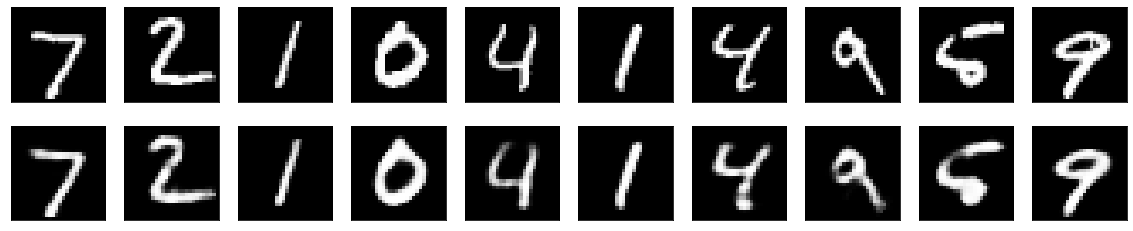

In [29]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [35]:
#Since it is expected that the encoded vectors with similar features (same digits)
#are closer to eachother, we can cluster with KMeans and see if this is true
#by plotting the means of each cluster
x = encoded_images
kmeans = KMeans(n_clusters=10)
kmeans.fit(x)
labels = kmeans.labels_

In [115]:
groups = pd.DataFrame(columns=['Label', 'Cluster'])

for i in range(len(y_test)):
    data = {'Label': y_test[i], 'Cluster': labels[i]}
    groups.loc[len(groups)] = data
    
grouped_df = groups.groupby(['Label','Cluster']).size().reset_index()
grouped_df

,Label,Cluster,0
0,0,0,9
1,0,1,1
2,0,2,12
3,0,3,27
4,0,5,7
...,...,...,...
88,9,5,15
89,9,6,10
90,9,7,316
91,9,8,1


D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


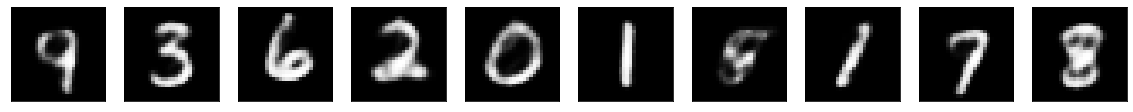

In [130]:
#Centers of all clusters plotted
kmeans_centers = [kmeans.cluster_centers_[i] for i in range(10)]
fig = plt.figure(figsize=(20, 4))
for i in range(len(kmeans_centers)):    
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoder.predict(np.expand_dims(kmeans_centers[i], axis=0), verbose=0).reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder with sparsity regularization

In [109]:
input_img =  Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent_layer = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)


decoded = Dense(64, activation='relu')(latent_layer)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


deep_autoencoder_sparse = Model(input_img, decoded)

encoder_sparse = Model(input_img, latent_layer)

encoder_input = Input(shape=(32,))
decoder_sparse = Model(latent_layer, decoded)

deep_autoencoder_sparse.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder_sparse.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


encoded_images_sparse = encoder_sparse.predict(x_test)

decoded_images_sparse = decoder_sparse.predict(encoded_images)

Epoch 1/20


D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


235/235 [==============================] - 8s 32ms/step - loss: 0.2454 - val_loss: 0.1701
Epoch 2/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1506 - val_loss: 0.1358
Epoch 3/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1305 - val_loss: 0.1238
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1221 - val_loss: 0.1174
Epoch 5/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1163 - val_loss: 0.1131
Epoch 6/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1121 - val_loss: 0.1093
Epoch 7/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1093 - val_loss: 0.1066
Epoch 8/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1071 - val_loss: 0.1054
Epoch 9/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1052 - val_loss: 0.1031
Epoch 10/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1036 - val_loss: 0.1017


In [110]:
x_sparse = encoded_images_sparse
kmeans_sparse = KMeans(n_clusters=10)
kmeans_sparse.fit(x_sparse)
labels = kmeans_sparse.labels_

D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


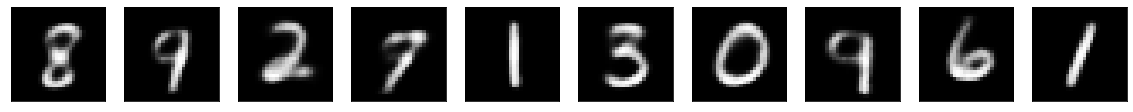

In [111]:
#Centers of all clusters plotted
kmeans_centers_sparse = [kmeans_sparse.cluster_centers_[i] for i in range(10)]
fig = plt.figure(figsize=(20, 4))
for i in range(len(kmeans_centers_sparse)):    
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoder_sparse.predict(np.expand_dims(kmeans_centers_sparse[i], axis=0), verbose=0).reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [152]:
from keras import layers
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [177]:
input_img_conv = Input(shape=(28, 28, 1))


x_conv = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img_conv)
x_conv = layers.MaxPool2D((2,2), padding='same')(x_conv)
x_conv = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x_conv)
x_conv = layers.MaxPool2D((2,2), padding='same')(x_conv)
x_conv = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x_conv)
encoded_conv = layers.MaxPool2D((2,2), padding='same')(x_conv)

x_conv = layers.Conv2D(8, (3,3), activation='relu', padding='same')(encoded_conv)
x_conv = layers.UpSampling2D((2,2))(x_conv)
x_conv = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x_conv)
x_conv = layers.UpSampling2D((2,2))(x_conv)
x_conv = layers.Conv2D(16, (3,3), activation='relu')(x_conv)
x_conv = layers.UpSampling2D((2,2))(x_conv)
decoder_conv = layers.Conv2D(1,(3,3), activation='sigmoid', padding='same')(x_conv)

encoder_input = Input(shape=(32,))

autoencoder_conv = Model(input_img_conv, decoder_conv)
encoder_conv = Model(input_img_conv, encoded_conv)
decode_conv = Model(encoded_conv, decoder_conv)
autoencoder_conv.compile(optimizer='adam', loss='binary_crossentropy')

In [163]:
autoencoder_conv.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 7, 8)           584

In [156]:
from keras.callbacks import TensorBoard

In [178]:
autoencoder_conv.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder_conv')],
                verbose=1)

Epoch 1/20


D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


469/469 [==============================] - 45s 96ms/step - loss: 0.2228 - val_loss: 0.1543
Epoch 2/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1437 - val_loss: 0.1339
Epoch 3/20
469/469 [==============================] - 45s 97ms/step - loss: 0.1303 - val_loss: 0.1254
Epoch 4/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1235 - val_loss: 0.1201
Epoch 5/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1192 - val_loss: 0.1165
Epoch 6/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1160 - val_loss: 0.1136
Epoch 7/20
469/469 [==============================] - 45s 97ms/step - loss: 0.1134 - val_loss: 0.1115
Epoch 8/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1112 - val_loss: 0.1092
Epoch 9/20
469/469 [==============================] - 45s 96ms/step - loss: 0.1093 - val_loss: 0.1071
Epoch 10/20
469/469 [==============================] - 45s 97ms/step - loss: 0.1078 - val_los

In [180]:
encoded_images_conv = encoder_conv.predict(x_test)

decoded_images_conv = decode_conv.predict(encoded_images_conv)

313/313 [==============================] - 2s 6ms/step


In [196]:
encoded_images_conv[0].shape

(4, 4, 8)

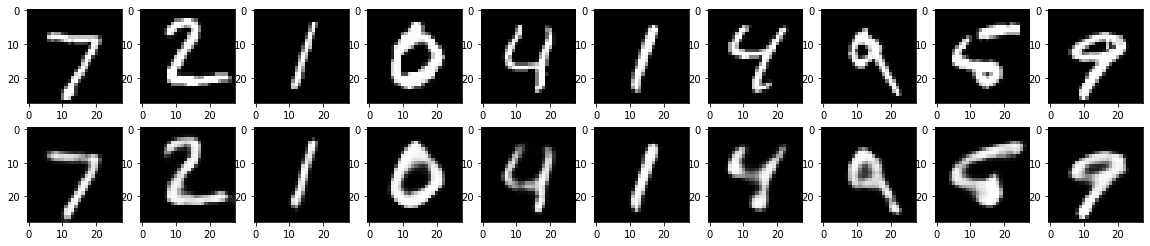

In [184]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_conv[i].reshape(28, 28))
    plt.gray()
    
plt.show()

# Image Denoising

In [203]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [221]:
noise = 0.5
x_train_noisy = x_train + noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

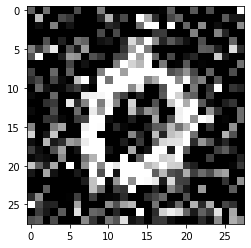

In [223]:
plt.imshow(x_test_noisy[3].reshape(28,28))

In [225]:
input_img_denoise = Input(shape=(28, 28, 1))


x_conv_denoise = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img_denoise)
x_conv_denoise = layers.MaxPool2D((2,2), padding='same')(x_conv_denoise)
x_conv_denoise = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x_conv_denoise)
encoded_denoise = layers.MaxPool2D((2,2), padding='same')(x_conv_denoise)
#Latent layer output shape (7, 7, 32)

x_conv_denoise = layers.Conv2D(32, (3,3), activation='relu', padding='same')(encoded_denoise)
x_conv_denoise = layers.UpSampling2D((2,2))(x_conv_denoise)
x_conv_denoise = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x_conv_denoise)
x_conv_denoise = layers.UpSampling2D((2,2))(x_conv_denoise)
decoded_denoise = layers.Conv2D(1,(3,3), activation='sigmoid', padding='same')(x_conv_denoise)

encoder_input_denoise = Input(shape=(32,))

autoencoder_denoise = Model(input_img_denoise, decoded_denoise)
encoder_denoise = Model(input_img_denoise, encoded_denoise)
decode_denoise = Model(encoded_denoise, decoded_denoise)
autoencoder_denoise.compile(optimizer='adam', loss='binary_crossentropy')

In [226]:
autoencoder_denoise.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 7, 32)          924

In [228]:
autoencoder_denoise.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder_denoise')],
                verbose=1)

Epoch 1/20
469/469 [==============================] - 68s 145ms/step - loss: 0.1050 - val_loss: 0.1029
Epoch 2/20
469/469 [==============================] - 67s 144ms/step - loss: 0.1031 - val_loss: 0.1014
Epoch 3/20
469/469 [==============================] - 67s 143ms/step - loss: 0.1016 - val_loss: 0.1000
Epoch 4/20
469/469 [==============================] - 67s 143ms/step - loss: 0.1005 - val_loss: 0.0993
Epoch 5/20
469/469 [==============================] - 67s 142ms/step - loss: 0.0997 - val_loss: 0.0986
Epoch 6/20
469/469 [==============================] - 67s 142ms/step - loss: 0.0989 - val_loss: 0.0978
Epoch 7/20
469/469 [==============================] - 67s 142ms/step - loss: 0.0984 - val_loss: 0.0974
Epoch 8/20
469/469 [==============================] - 67s 142ms/step - loss: 0.0979 - val_loss: 0.0970
Epoch 9/20
469/469 [==============================] - 67s 142ms/step - loss: 0.0975 - val_loss: 0.0965
Epoch 10/20
469/469 [==============================] - 67s 142ms/step - l

In [ ]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_conv[i].reshape(28, 28))
    plt.gray()
    
plt.show()

In [229]:
encoded_images_denoise = encoder_denoise.predict(x_test_noisy)
decoded_images_denoise = encoder_denoise.predict(encoded_images_denoise)

D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 6ms/step


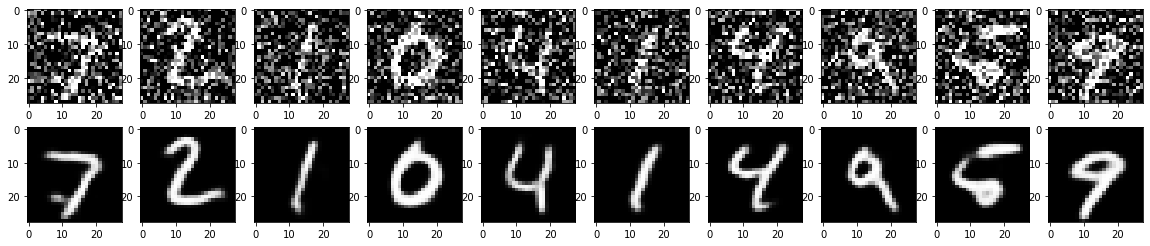

In [231]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_denoise[i].reshape(28, 28))
    plt.gray()
    
plt.show()

# Variational autoencoder

In [39]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [40]:
from keras import backend as K
from keras.layers import Lambda
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

In [41]:
#encoder
encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

#decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [42]:
from keras import losses
reconstruction_loss = losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=30,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 84s 45ms/step - loss: 189.7522 - val_loss: 170.2540
Epoch 2/30
1875/1875 [==============================] - 84s 45ms/step - loss: 167.7726 - val_loss: 164.8612
Epoch 3/30
1875/1875 [==============================] - 85s 45ms/step - loss: 163.6073 - val_loss: 161.5446
Epoch 4/30
1875/1875 [==============================] - 86s 46ms/step - loss: 160.8298 - val_loss: 159.7521
Epoch 5/30
1875/1875 [==============================] - 87s 47ms/step - loss: 159.0065 - val_loss: 158.2092
Epoch 6/30
1875/1875 [==============================] - 89s 47ms/step - loss: 157.6767 - val_loss: 157.2395
Epoch 7/30
1875/1875 [==============================] - 91s 48ms/step - loss: 156.6216 - val_loss: 156.2867
Epoch 8/30
1875/1875 [==============================] - 93s 50ms/step - loss: 155.7485 - val_loss: 155.7648
Epoch 9/30
1875/1875 [==============================] - 96s 51ms/step - loss: 154.9871 - val_loss: 155.1964
Epoch 10/30
1875/1875 [=====

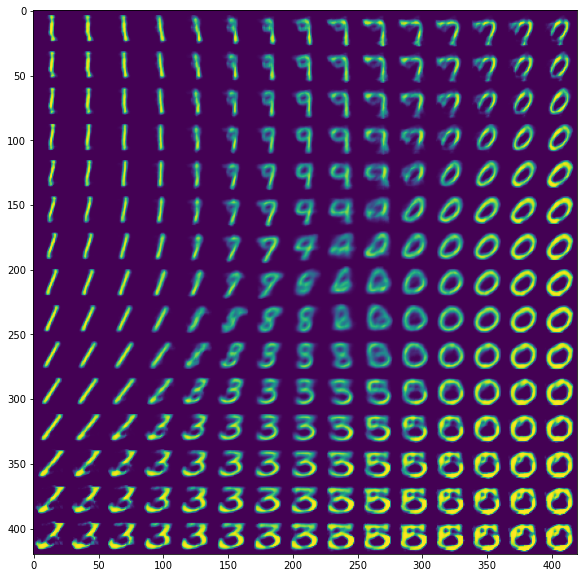

In [44]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [ ]:
vae.save("Autoencoders/")

In [32]:
encoder.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 47ms/step


[array([[1.1848263 , 0.34327468]], dtype=float32),
 array([[-0.8776932, -1.1868811]], dtype=float32),
 array([[1.191378  , 0.35181382]], dtype=float32)]

In [33]:
z_mean_test, z_log_sigma_test = encoder.predict(x_test)[0:2]

 36/313 [==>...........................] - ETA: 1s

D:\Anaconda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 5ms/step


In [36]:
z_mean_test.max()

3.5892768